* In my part, I do the analysis of education. For children, more peers in the campus represent more opportunities to make fridends with others, which is good for mental health. Furhtermore, they have more channces to study in a group, and get many useful suggestions from calssmates who are good at different subjects. Therefore, the enrollment number is a very important standard, when I consider the eduaction in our neighborhood.

* In my part of analysis, by campared enrollment numbers of stuents, I will figure out best neighborhood who have largest enrollment numebrs in public school and the best circumstance for study and social intercourse.


In [1]:
# Loading and importing raw data
import pandas as pd
import matplotlib.pyplot as plt

Enrollment = pd.read_csv("Enrollment by Neighborhood 2020-21 school yr.csv")

# Forming raw datasheet
Enrollment 


,neighborhood,african_american,american_indian,asian__not_pacific_islander,hispanic,multiracial,native_hawaiian_or_other_pacific_islander,white,total_students_enrolled,student_count_redactions,attending_feeder,attending_nonfeeder,total_with_feeder_status,feeder_count_redactions,grade_level
0,Allegheny Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
1,Allegheny West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
2,Allentown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
3,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
4,Arlington Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,West End,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,9-12
356,West Oakland,13.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Y,NaN,NaN,14.0,Y,9-12
357,Westwood,NaN,NaN,17.0,NaN,NaN,NaN,34.0,62.0,Y,41.0,21.0,62.0,NaN,9-12
358,Wilkinsburg Borough,178.0,NaN,NaN,NaN,NaN,NaN,NaN,194.0,Y,NaN,NaN,194.0,Y,9-12


In [10]:
# Forming intened datasheet
# In the row datasheet, the enrollment number was recorded in each quarter.
#By adding all enrollment numebr in 4 quarters together, I get total enrollment by year.
# Then I make the ranking list of total enrollment by year.  
Total_Enrollment_Year = Enrollment.groupby('neighborhood').sum()

Total_Enrollment_Year.sort_values("total_students_enrolled", ascending=False, inplace=True)

Total_Enrollment_Year[['total_students_enrolled']]

,total_students_enrolled
neighborhood,
Carrick,1276.0
Brookline,1169.0
Beechview,794.0
Sheraden,694.0
Squirrel Hill South,679.0
...,...
North Oakland,0.0
South Shore,0.0
Ridgemont,0.0


In [62]:
# Obtaining total enrollment number of all neighborhoods
# In 2020-2021, the total enrollment from all neighborhoods is 22041. 
Total_Enrollment_Year['total_students_enrolled'].sum()

22041.0

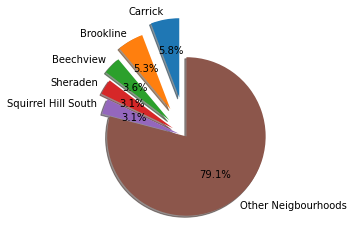

In [3]:
# Visualization of the processed data
# Pie chart shows top five neighborhoods who have many freshman students. 
#The best neighbourhood is Carrick, enrolled students from Carrick occupy 5.8% of total- 
#enrollment in all of neighborhoods.

labels = 'Carrick','Brookline','Beechview','Sheraden','Squirrel Hill South','Other Neigbourhoods'
sizes = [1276, 1169, 794, 694, 679, 17429]
explode = (0.5, 0.4, 0.3, 0.2, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

<AxesSubplot:>

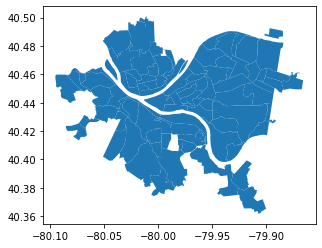

In [4]:
# Map Visualization of the processed data
# Firstly, Importing an map of Pittsburgh
import pandas as pd
import geopandas
%matplotlib inline
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [50]:
# read in the shapefile
Total_Enrollment_Year = Enrollment.groupby('neighborhood').sum()

# plot the geopandas dataframe
Total_Enrollment_Year.sort_values("total_students_enrolled", ascending=False, inplace=True)

In [57]:
Enrollment_map = neighborhoods.merge(Total_Enrollment_Year, how='left', left_on='hood', right_on='neighborhood')

<AxesSubplot:>

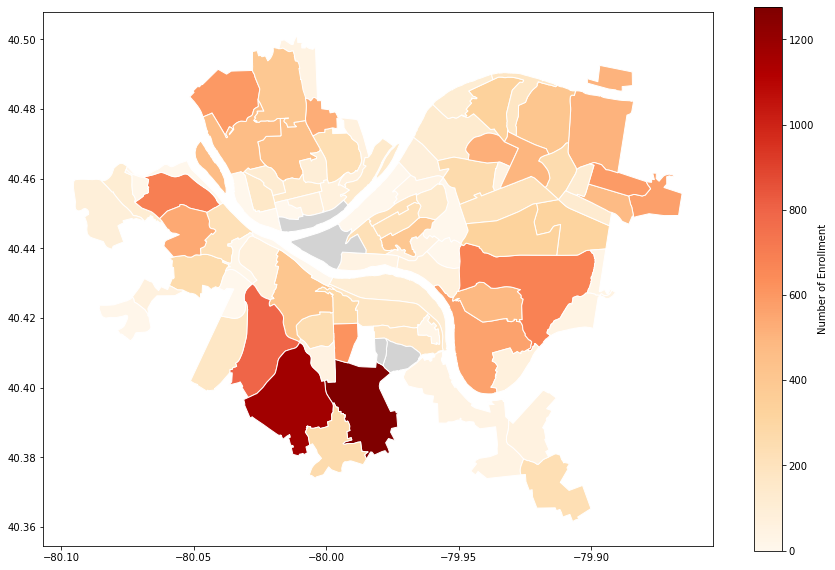

In [58]:
#Combination of the enrollment data and the map
#Thses white areas and grey indicate that few enrolled students in these white area.

#These red areas indicate that compared with white areas,there are-
#more enrolled students in these red areas

Enrollment_map.plot(column='total_students_enrolled', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Enrollment"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
                   )

##In Conclusion, after the analysis, Carrick is the best neigborhood who can provid best education cricumstance to children. According to the dataset from 2020-2021, there were 22041 enrolled students from all neighborhoods. Carrick had 1276, which occupy 5.8% of total enrollment in all of neighborhoods.(Showing in the pie chart)

##Furthermore, according to the above map, the south part of the map have more red areas than other parts, which indicates that south part have more enrolled students in public school. 